In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

In [20]:
def equation_to_fit(x1, x2, a, b, c):
    return x1**a + b*x2 + c

In [23]:
data = pd.read_excel('data2.xlsx')
data.head()
######################## Some reminders ####################################
# MyData.x                                  # Data of column called "x"
# MyData.iloc[0,:]                          # First row
# MyData.iloc[:,0]                          # First column
# MyData.columns[0]                         # Name of first column
# MyData['Seconds'] = 3600 * MyData.Hours   # Create a new column named as such and caluclated as such

,x1,x2,y
0,0.0,0.0,7.60
1,0.0,0.2,9.24
2,0.0,0.4,10.88
3,0.0,0.6,12.52
4,0.0,0.8,14.16


In [7]:
# least_squares

In [24]:
def error_function(current_parameter_guess):
    current_parameter_guess = tuple(current_parameter_guess)
    y_guess = equation_to_fit(data.x1, data.x2, *current_parameter_guess) 
    error = y_guess - data.y
    return error

initial_guess = (100, 100, 100)
low_bounds = [0, 0, 0]
up_bounds = [100, 100, 100]
least_squares_fitted_parameters = least_squares(error_function,
                                                initial_guess, 
                                                bounds=(low_bounds, 
                                                up_bounds)
                                                ).x
print(least_squares_fitted_parameters)

[ 2.5  8.2  7.6]


(11, 11)


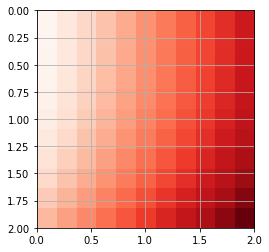

In [43]:
heat = np.empty([11,11])
for a in range(0,11):
    heat[a,:] = data.iloc[a*11:(a+1)*11,2]
print(heat.shape)
plt.imshow(heat, cmap=plt.cm.Reds, interpolation='none', extent=[0,2,2,0])
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [38]:
# Now let's compare them

In [11]:
print('The curve_fit parameters are estimated to be', curve_fit_fitted_parameters)
print('The least_squares parameters are estimated to be', least_squares_fitted_parameters)

The curve_fit parameters are estimated to be [ 0.86923314  8.91546611  1.23210541  0.69330163]
The least_squares parameters are estimated to be [ 0.86923314  8.91546611  1.23210541  0.69330163]


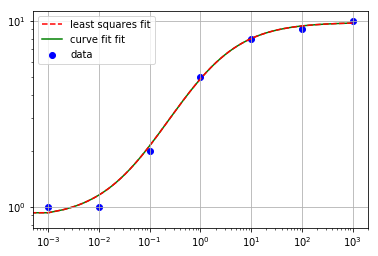

In [13]:
xsmooth = np.linspace(min(data.x), max(data.x), 1000000)
plt.scatter(data.x, data.y, c='b', label='data')
plt.plot(xsmooth, equation_to_fit(xsmooth, *least_squares_fitted_parameters), c='r', label='least squares fit', ls = '--', zorder=1)
plt.plot(xsmooth, equation_to_fit(xsmooth, *curve_fit_fitted_parameters), c='g', label='curve fit fit', zorder=0)

plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()